<a href="https://colab.research.google.com/github/itsmeritika/Machine_learning_7_day_training/blob/main/Loan_Approval_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [133]:
import pandas as pd

In [134]:
df = pd.read_csv('/content/train.csv')

In [135]:
train = df.copy()


In [136]:
train.columns

Index(['id', 'person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_default_on_file',
       'cb_person_cred_hist_length', 'loan_status'],
      dtype='object')

In [137]:
train.dtypes

,0
id,int64
person_age,int64
person_income,int64
person_home_ownership,object
person_emp_length,float64
loan_intent,object
loan_grade,object
loan_amnt,int64
loan_int_rate,float64
loan_percent_income,float64


In [138]:
train.shape

(58645, 13)

In [139]:
train['loan_status'].value_counts()

,count
loan_status,
0,50295
1,8350


In [140]:
train['loan_status'].value_counts(normalize=True)

,proportion
loan_status,
0,0.857618
1,0.142382


<Axes: xlabel='loan_status'>

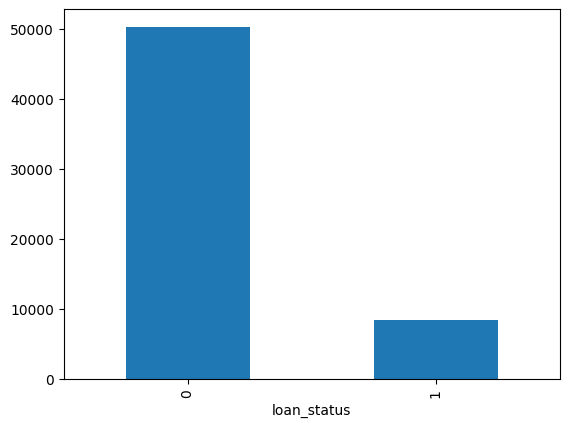

In [141]:
train['loan_status'].value_counts().plot.bar()

In [142]:
categorical_df = train.select_dtypes(include='object')
categorical_df.columns

Index(['person_home_ownership', 'loan_intent', 'loan_grade',
       'cb_person_default_on_file'],
      dtype='object')

In [143]:
train['cb_person_default_on_file'].value_counts()

,count
cb_person_default_on_file,
N,49943
Y,8702


<ipython-input-144-8d50f39b8a8b>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['person_income'])


<Axes: xlabel='person_income', ylabel='Density'>

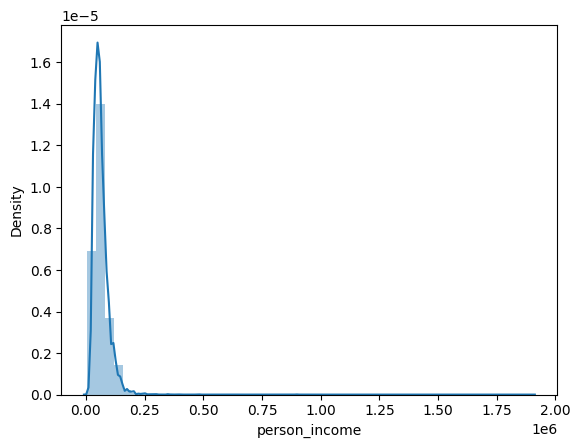

In [144]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(train['person_income'])

In [145]:
import numpy as np

train['person_income_log'] = np.log(train['person_income'])


<ipython-input-146-deeb5fd88199>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['person_age'])


<Axes: xlabel='person_age', ylabel='Density'>

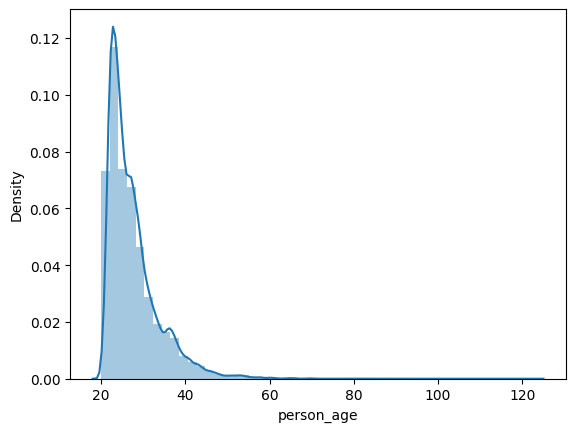

In [146]:
sns.distplot(train['person_age'])

In [147]:
import numpy as np


In [148]:
train.columns

Index(['id', 'person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_default_on_file',
       'cb_person_cred_hist_length', 'loan_status', 'person_income_log'],
      dtype='object')

In [149]:
train['id'].value_counts()

,count
id,
0,1
39089,1
39091,1
39092,1
39093,1
...,...
19551,1
19552,1
19553,1


In [150]:
train.drop('id', axis=1, inplace=True)
train.drop('person_income', axis=1, inplace=True)


In [151]:
train.columns

Index(['person_age', 'person_home_ownership', 'person_emp_length',
       'loan_intent', 'loan_grade', 'loan_amnt', 'loan_int_rate',
       'loan_percent_income', 'cb_person_default_on_file',
       'cb_person_cred_hist_length', 'loan_status', 'person_income_log'],
      dtype='object')

In [152]:
Grade = pd.crosstab(train['loan_grade'], train['loan_status'])
Grade


loan_status,0,1
loan_grade,,
A,19952,1032
B,18313,2087
C,9542,1494
D,2046,2988
E,378,631
F,58,91
G,6,27


<Axes: xlabel='loan_grade'>

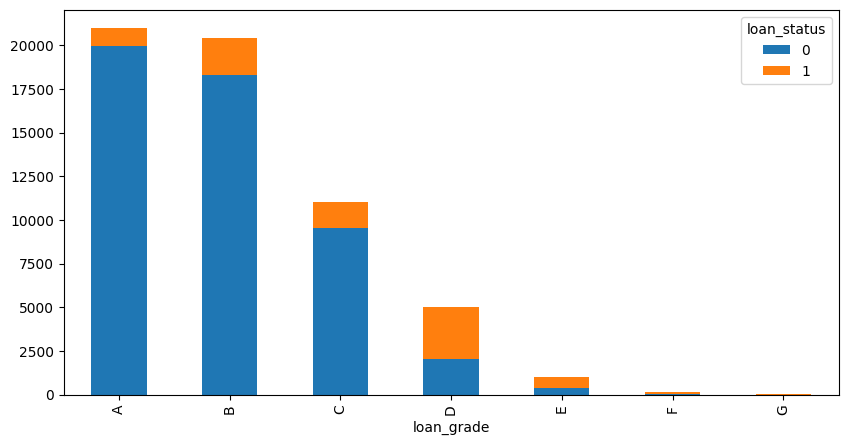

In [153]:
Grade.plot(kind='bar', stacked=True, figsize=(10,5))

In [154]:
numeric_df = train.select_dtypes(include=['number'])
numeric_df.columns

Index(['person_age', 'person_emp_length', 'loan_amnt', 'loan_int_rate',
       'loan_percent_income', 'cb_person_cred_hist_length', 'loan_status',
       'person_income_log'],
      dtype='object')

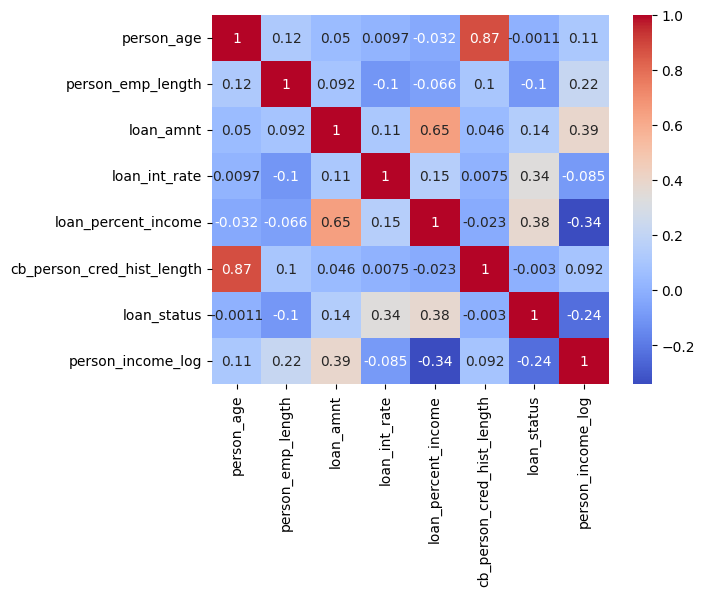

In [155]:
mat = numeric_df.corr()
sns.heatmap(mat, annot=True, cmap='coolwarm')
plt.show()

In [156]:
train.isnull().sum()

,0
person_age,0
person_home_ownership,0
person_emp_length,0
loan_intent,0
loan_grade,0
loan_amnt,0
loan_int_rate,0
loan_percent_income,0
cb_person_default_on_file,0
cb_person_cred_hist_length,0


In [157]:
X = train.drop('loan_status', axis=1)
y = train.loan_status

In [158]:
cat_col = list(categorical_df.columns)
cat_col

['person_home_ownership',
 'loan_intent',
 'loan_grade',
 'cb_person_default_on_file']

In [159]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
for col in cat_col:
  X[col] = encoder.fit_transform(X[col])

In [160]:
X.dtypes

,0
person_age,int64
person_home_ownership,int64
person_emp_length,float64
loan_intent,int64
loan_grade,int64
loan_amnt,int64
loan_int_rate,float64
loan_percent_income,float64
cb_person_default_on_file,int64
cb_person_cred_hist_length,int64


In [161]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [162]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model_fr = LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [163]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.8843038622218433

In [164]:
X_train.columns

Index(['person_age', 'person_home_ownership', 'person_emp_length',
       'loan_intent', 'loan_grade', 'loan_amnt', 'loan_int_rate',
       'loan_percent_income', 'cb_person_default_on_file',
       'cb_person_cred_hist_length', 'person_income_log'],
      dtype='object')

In [165]:
temp_X = X_train[['person_home_ownership',
       'loan_intent', 'loan_grade', 'loan_int_rate',
       'loan_percent_income', 'cb_person_default_on_file', 'person_income_log']]


In [166]:
fet_model = LogisticRegression()
fet_model.fit(temp_X, y_train)

LogisticRegression()

In [167]:
temp_test = X_test[['person_home_ownership',
       'loan_intent', 'loan_grade', 'loan_int_rate',
       'loan_percent_income', 'cb_person_default_on_file', 'person_income_log']]

In [168]:
fet_pred = fet_model.predict(temp_test)
accuracy_score(y_test, fet_pred)

0.8990536277602523

In [169]:
param_grid_lr = {'C': [0.01, 0.1, 1, 10],
                 'penalty': ['l1', 'l2'],
                 'solver': ['liblinear']}

In [170]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(fet_model, param_grid_lr, cv=5, scoring='accuracy')
grid_search.fit(temp_X, y_train)

print('Best Parameters:',grid_search.best_params_)
print('Best Score:',grid_search.best_score_)


Best Parameters: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
Best Score: 0.8946414876299021


In [171]:
best_model = grid_search.best_estimator_
pred = best_model.predict(temp_test)
accuracy_score(y_test, pred)

0.8994799215619405

In [172]:
import joblib
joblib.dump(best_model, 'best_model.pkl')

['best_model.pkl']

In [173]:
best_model1 = joblib.load('best_model.pkl')
pred = best_model1.predict(temp_test)
accuracy_score(y_test, pred)

0.8994799215619405